# Test enrichment score

In [21]:
import numpy as np

In [1]:
def cal_EnrichmentScore(glst, gdict):
    '''
    glist:  cluster of genes
    g_dict: profile
    '''
    N = len(gdict)
    n = len(glst)
    m = N - n
    #print(N,n,m)
    lst = [(k,v) for k,v in gdict.items()]
    lst.sort(key = lambda x:x[1], reverse=True)
    rank_lst = list()
    ep_lst = list()
    for i,j in enumerate(lst):
        if j[0] in glst:
            rank_lst.append(i+1)
            ep_lst.append(j[1])
    #  print(ep_lst)
    rank_arr = np.array(rank_lst)
    ep_arr = np.abs(np.array(ep_lst))
    #  print(rank_arr)
    #  print(ep_arr)
    #  ep_arr = np.ones(n)
    norm_ep_arr = ep_arr / ep_arr.sum()
    diff_arr = np.zeros(n)
    diff_arr[0] = rank_arr[0] - 1
    diff_arr[1:] = rank_arr[1:]- rank_arr[:n-1] -1
    norm_diff_arr = diff_arr/m
    peak_res_arr = np.cumsum(norm_ep_arr - norm_diff_arr)
    #valley_res_arr = peak_res_arr -  norm_ep_arr
    max_ES = peak_res_arr.max()
    #min_ES = valley_res_arr.min()
    #  print(max_ES)
    #  print(min_ES)
    #ES = round(max_ES if max_ES >= -min_ES else min_ES,4) 
    return max_ES

# 1.buid a sorted list and a set genes

In [9]:
keys=['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q']
values=[1,2,3,5,10,11,13,15,20,21,24,25,30,35,40,50,100]

In [18]:
dir_origin={}
for i in range(len(keys)):
    dir_origin[keys[i]]=values[i]

In [19]:
dir_origin

{'A': 1,
 'B': 2,
 'C': 3,
 'D': 5,
 'E': 10,
 'F': 11,
 'G': 13,
 'H': 15,
 'I': 20,
 'J': 21,
 'K': 24,
 'L': 25,
 'M': 30,
 'N': 35,
 'O': 40,
 'P': 50,
 'Q': 100}

In [13]:
gene_set=['M','N','O','P','Q']

In [22]:
es_origin=cal_EnrichmentScore(gene_set,dir_origin)
es_origin

1.0

# 2.Simulation--random the list and output enrichment scores

In [23]:
import random

In [31]:
ES_Ls=[]
for i in range(10000):
    new_values=values.copy()
    random.shuffle(new_values)
    new_dir={}
    for j in range(len(keys)):
        new_dir[keys[j]]=new_values[j]
    new_es=cal_EnrichmentScore(gene_set,new_dir)
    ES_Ls.append(new_es)

# 3.plot result

In [32]:
import matplotlib.pyplot as plt

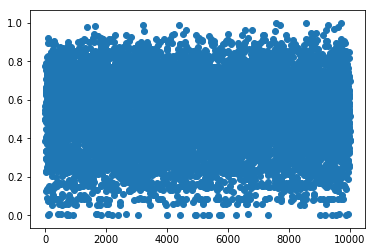

In [33]:
X=range(len(ES_Ls))
Y=ES_Ls
plt.scatter(X,Y)
plt.show()

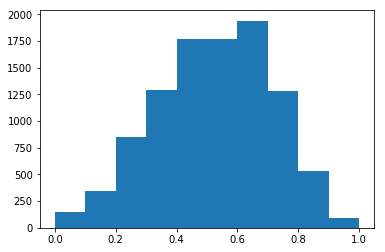

In [34]:
plt.hist(Y)
plt.show()

In [30]:
help(plt.hist)

Help on function hist in module matplotlib.pyplot:

hist(x, bins=None, range=None, density=None, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, normed=None, hold=None, data=None, **kwargs)
    Plot a histogram.
    
    Compute and draw the histogram of *x*. The return value is a
    tuple (*n*, *bins*, *patches*) or ([*n0*, *n1*, ...], *bins*,
    [*patches0*, *patches1*,...]) if the input contains multiple
    data.
    
    Multiple data can be provided via *x* as a list of datasets
    of potentially different length ([*x0*, *x1*, ...]), or as
    a 2-D ndarray in which each column is a dataset.  Note that
    the ndarray form is transposed relative to the list form.
    
    Masked arrays are not supported at present.
    
    Parameters
    ----------
    x : (n,) array or sequence of (n,) arrays
        Input values, this takes either a single array or a sequency of


In [35]:
def cal_EnrichmentScore(glst, gdict):
    '''
    glist:  cluster of genes
    g_dict: profile
    '''
    N = len(gdict)
    n = len(glst)
    m = N - n
    #print(N,n,m)
    lst = [(k,v) for k,v in gdict.items()]
    lst.sort(key = lambda x:x[1], reverse=True)
    rank_lst = list()
    ep_lst = list()
    for i,j in enumerate(lst):
        if j[0] in glst:
            rank_lst.append(i+1)
            ep_lst.append(j[1])
    #  print(ep_lst)
    rank_arr = np.array(rank_lst)
    ep_arr = np.abs(np.array(ep_lst))
    #  print(rank_arr)
    #  print(ep_arr)
    #  ep_arr = np.ones(n)
    norm_ep_arr = ep_arr / ep_arr.sum()
    diff_arr = np.zeros(n)
    diff_arr[0] = rank_arr[0] - 1
    diff_arr[1:] = rank_arr[1:]- rank_arr[:n-1] -1
    norm_diff_arr = diff_arr/m
    peak_res_arr = np.cumsum(norm_ep_arr - norm_diff_arr)
    #valley_res_arr = peak_res_arr -  norm_ep_arr
    #max_ES = peak_res_arr.max()
    #min_ES = valley_res_arr.min()
    #  print(max_ES)
    #  print(min_ES)
    #ES = round(max_ES if max_ES >= -min_ES else min_ES,4) 
    return peak_res_arr

In [36]:
gene_set

['M', 'N', 'O', 'P', 'Q']

In [37]:
dir_origin

{'A': 1,
 'B': 2,
 'C': 3,
 'D': 5,
 'E': 10,
 'F': 11,
 'G': 13,
 'H': 15,
 'I': 20,
 'J': 21,
 'K': 24,
 'L': 25,
 'M': 30,
 'N': 35,
 'O': 40,
 'P': 50,
 'Q': 100}

In [38]:
y=cal_EnrichmentScore(gene_set,dir_origin)

In [39]:
y

array([ 0.39215686,  0.58823529,  0.74509804,  0.88235294,  1.        ])

In [40]:
x=range(len(y))

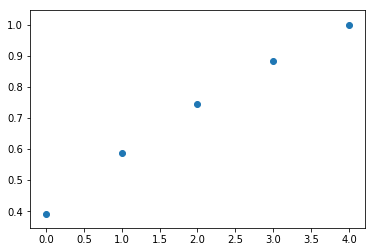

In [41]:
plt.scatter(x,y)
plt.show()

In [42]:
gene_set

['M', 'N', 'O', 'P', 'Q']

In [43]:
values

[1, 2, 3, 5, 10, 11, 13, 15, 20, 21, 24, 25, 30, 35, 40, 50, 100]

In [46]:
random.shuffle(values)

In [47]:
values

[24, 15, 1, 11, 10, 20, 35, 13, 100, 30, 50, 5, 40, 25, 3, 21, 2]

In [49]:
dir_new={}
for i in range(len(values)):
    dir_new[keys[i]]=values[i]

In [50]:
dir_new

{'A': 24,
 'B': 15,
 'C': 1,
 'D': 11,
 'E': 10,
 'F': 20,
 'G': 35,
 'H': 13,
 'I': 100,
 'J': 30,
 'K': 50,
 'L': 5,
 'M': 40,
 'N': 25,
 'O': 3,
 'P': 21,
 'Q': 2}

In [51]:
Y_new=cal_EnrichmentScore(gene_set,dir_new)

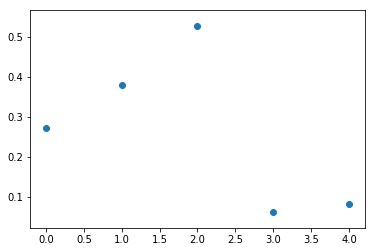

In [52]:
plt.scatter(x,Y_new)
plt.show()

In [53]:
Y_new

array([ 0.27289377,  0.38095238,  0.52838828,  0.06135531,  0.08333333])